# Scaling
Mengubah data menjadi dalam range yang sama (biasanya nilainya kecil). Paling baik digunakan untuk KNN dan Linear Regresi

* MinMax
* Standard
* Robust

In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips= sns.load_dataset('tips')
tips[['total_bill', 'tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


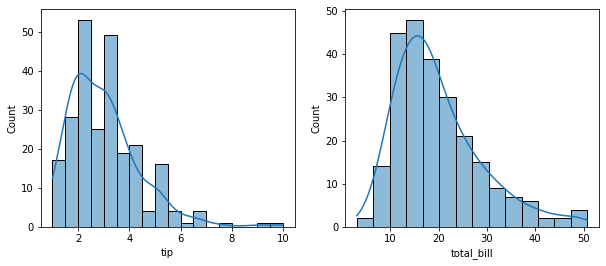

In [3]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.histplot(tips['tip'],kde=True)

plt.subplot(122)
sns.histplot(tips['total_bill'], kde=True)

In [4]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [6]:
x=tips[['tip','total_bill']]

## MinMax

mengubah data menjadi di dalam range 0-1

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}

In [7]:
minmax=MinMaxScaler()
x_minmax=pd.DataFrame(minmax.fit_transform(x), columns=x.columns)
x_minmax.head()

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775


In [8]:
x_minmax.describe()
# nilai min dan maks kedua kolom adalah 0 dan 1

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


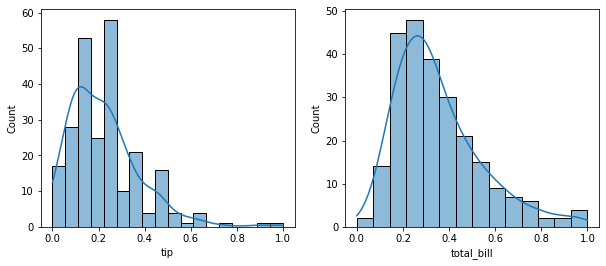

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.histplot(x_minmax['tip'],kde=True)

plt.subplot(122)
sns.histplot(x_minmax['total_bill'], kde=True)

## Standard Scaler  

Mengubah data sehingga memiliki rata-rata=0 dan standard deviasi=1  

\begin{align}
z_i = \frac{x_i - \bar{x}}{s}
\end{align}

In [10]:
standard= StandardScaler()
x_standard=pd.DataFrame(standard.fit_transform(x),columns=x.columns)
x_standard.head()

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745


In [11]:
x_standard.describe()
#nilai mean kedua kolom mendekati 0 dan nilai std mendekati 1

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.846297e-16,-6.597637e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


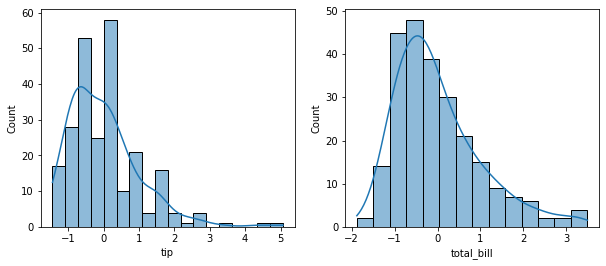

In [12]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.histplot(x_standard['tip'],kde=True)

plt.subplot(122)
sns.histplot(x_standard['total_bill'], kde=True)

## Robust Scaler

Mengubah nilai data, berdasarkan nilai Q1 dan Q3nya. Biasanya digunakan untuk data dengan banyak outlier.

\begin{align}
z_i = \frac{x_i - Q_1(x_i)}{Q_3(x_i) - Q_1(x_i)}
\end{align}

In [13]:
robust= RobustScaler()
x_robust= pd.DataFrame(robust.fit_transform(x), columns=x.columns)
x_robust.head()

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334


In [14]:
x_robust.describe()
# nilai median mendekati 0

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


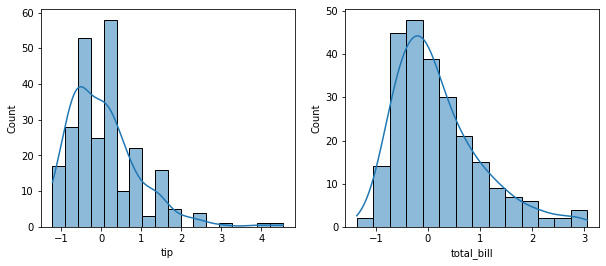

In [15]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.histplot(x_robust['tip'],kde=True)

plt.subplot(122)
sns.histplot(x_robust['total_bill'], kde=True)

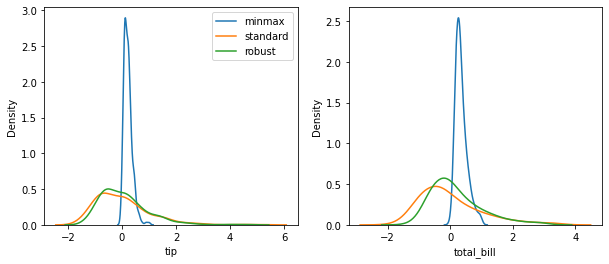

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.kdeplot(x_minmax['tip'])
sns.kdeplot(x_standard['tip'])
sns.kdeplot(x_robust['tip'])
plt.legend(['minmax','standard','robust'])

plt.subplot(122)
sns.kdeplot(x_minmax['total_bill'])
sns.kdeplot(x_standard['total_bill'])
sns.kdeplot(x_robust['total_bill'])

# Encoding

## One hot
mengubah tiap kategori di dalam suatu fitur menjadi masing-masing 1 kolom berisi angka 0 dan 1.  
Baik dipakai untuk data kategorikal nominal, tapi bisa juga dipakai untuk data ordinal.

In [17]:
# !pip install category_encoders

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
# pandas 
pd.get_dummies(tips)

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [20]:
# sklearn
onehot=OneHotEncoder()
onehot.fit_transform(tips)
# semua kolom di onehot, termasuk data numerik, sehingga menghasilkan matriks berukuran 244x 368

<244x368 sparse matrix of type '<class 'numpy.float64'>'
	with 1708 stored elements in Compressed Sparse Row format>

In [21]:
transformer=ColumnTransformer([
    ('onehot',OneHotEncoder(),['sex','smoker','day','time']),#nama, transformer, kolom
])

In [22]:
pd.DataFrame(transformer.fit_transform(tips),columns=transformer.get_feature_names())
# output hanya kolom hasil one hot encoding

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,onehot__x0_Female,onehot__x0_Male,onehot__x1_No,onehot__x1_Yes,onehot__x2_Fri,onehot__x2_Sat,onehot__x2_Sun,onehot__x2_Thur,onehot__x3_Dinner,onehot__x3_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Ordinal Encoder  
Sesuai namanya, digunakan untuk data kategorikal ordinal. Mengubah data kategorikal menjadi angka sesuai urutan yang ditentukan.

In [24]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [25]:
# menggunakan .map

tips['day'].map({'Thur':1, 'Fri':2,'Sat':3, 'Sun':4})

0      4
1      4
2      4
3      4
4      4
      ..
239    3
240    3
241    3
242    3
243    1
Name: day, Length: 244, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [26]:
# category encoder library
# lebih disarankan pakai ini, karena bisa di streamline dengan library sklearn
import category_encoders as ce

In [27]:
ordinal_mapping= [{'col':'day',
                  'mapping':{None:0,'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4}}]

In [28]:
ordinal_encoder=ce.OrdinalEncoder(mapping=ordinal_mapping)
ordinal_encoder.fit_transform(tips['day'])

,day
0,4
1,4
2,4
3,4
4,4
...,...
239,3
240,3
241,3
242,3


In [38]:
# encoding lebih dari 1 kolom

ordinal_mapping=[{'col':'day',
                 'mapping':{None:0,'Thur':1,'Fri':2, 'Sat':3, 'Sun':4}},
                 {'col':'time',
                 'mapping':{None:0,'Lunch':1,'Dinner':2}}]

In [39]:
ordinal_encoder=ce.OrdinalEncoder(mapping=ordinal_mapping)
ordinal_encoder.fit_transform(tips[['day','time']])

,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2
...,...,...
239,3,2
240,3,2
241,3,2
242,3,2


## Binary Encoder
mengubah data kategorikal menjadi beberapa kolom berdasarkan angka binary dari kategori yang ada, dengan jumlah kolom sesuai jumlah digit angka binari yang paling banyak.  
Digunakan untuk data kategorikal nominal, terutama yang memiliki jumlah kategori banyak.

In [40]:
binary=ce.BinaryEncoder()
binary.fit_transform(tips['day'])

,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


# Apply Several Preprocessing Method to Modeling: Ridge

data: tips  
* target: tip
* Feature preprocessing:
    * one hot encoding: sex, smoker, time
    * binary encoder: day
    * robust scaler: total_bill
    * no treatment: size  
    
* Random state:10
* data splitting :70-30
* model ridge default
    
**Hasil encoding, jangan discaling, karena data hasil encoding sebenarnya adalah data kategorikal, bukan numerik. Sementara, scaling seharusnya dilakukan untuk data numerik.**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

## Data

In [42]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Data Splitting

In [43]:
x=tips.drop(columns='tip')
y=tips['tip']

In [45]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=10)

# Data Transformer

In [46]:
transformer= ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['sex','smoker','time']), #nama, transformer, kolom
    ('binary', ce.BinaryEncoder(),['day']),
    ('robust',RobustScaler(),['total_bill'])
], remainder='passthrough') #sisa kolom yang tidak diapa2kan, tetap ada/ jangan didrop

In [47]:
transformer.fit_transform(x) #cek jalan/tidak

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00, -7.46753247e-02,  2.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00, -6.91558442e-01,  3.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  2.98237477e-01,  3.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  4.52226345e-01,  2.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.31910946e-03,  2.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  9.13729128e-02,  2.00000000e+00]])

In [48]:
x.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [53]:
x_train_preprocessed=pd.DataFrame(transformer.fit_transform(x_train))
x_train_preprocessed.head()

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0


In [55]:
x_test_preprocessed=pd.DataFrame(transformer.transform(x_test))
x_test_preprocessed.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,1.0,0.0,-0.117435,3.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.251129,2.0
2,1.0,1.0,0.0,0.0,0.0,1.0,-0.334237,2.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.070461,4.0
4,1.0,1.0,0.0,0.0,0.0,1.0,-0.225836,2.0


In [56]:
transformer.transformers_
#isi dari transformer

[('one hot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('binary', BinaryEncoder(), ['day']),
 ('robust', RobustScaler(), ['total_bill']),
 ('remainder', 'passthrough', [5])]

In [58]:
transformer.transformers_[0][1] #indexing untuk akses onehotencoder

OneHotEncoder(drop='first')

In [63]:
transformer.transformers_[0][1].get_feature_names() #nama kolom hasil transformasi onehotencoder

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [62]:
transformer.transformers_[1][1].get_feature_names() #nama kolom hasil binary encoder

['day_0', 'day_1', 'day_2']

In [66]:
features=list(transformer.transformers_[0][1].get_feature_names())+transformer.transformers_[1][1].get_feature_names()+['total_bill','size']
features
#nama kolom setelah preproses

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_Male',
 'x1_Yes',
 'x2_Lunch',
 'day_0',
 'day_1',
 'day_2',
 'total_bill',
 'size']

In [67]:
x_train_preprocessed.columns=features
x_test_preprocessed.columns=features

In [68]:
x_train_preprocessed.head()

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill,size
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0


## Model Fitting and Evaluation

In [69]:
ridge=Ridge()
ridge.fit(x_train_preprocessed,y_train)

Ridge()

In [71]:
y_pred=ridge.predict(x_test_preprocessed)
print('mse:', mean_squared_error(y_test,y_pred), '\nrmse',mean_squared_error(y_test,y_pred)**(1/2))
# hasil prediksi kita memiliki standard deviasi error 1.028 USD#

mse: 1.0577456219830779 
rmse 1.028467608621233


## Model Properties

In [72]:
pd.DataFrame({
    'features':features,
    'coef': ridge.coef_
})

,features,coef
0,x0_Male,-0.219943
1,x1_Yes,-0.071079
2,x2_Lunch,0.116938
3,day_0,0.031693
4,day_1,-0.002460
5,day_2,-0.061386
6,total_bill,1.086144
7,size,0.172890


# Apply Several Preprocessing Method to Modeling: DecisionTreeRegressor  

data : tips  
target : tip  
preprocess v1:   
1. one hot encoding : sex, smoker, time  
2. ordinal encoding : day  
3. no treatment : size, total_bill    

Random state 10, data splitting 70:30 model Tree(max depth 3)  

In [75]:
# buat transformer untuk preprocessing di atas.
# transform x train dan x test kalian, buat menjadi dataframe x_train_preprocessed dan x_test_preprocessed.

## Data Preprocessing

In [88]:
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0,'Thur':1,'Fri':2,'Sat':3,'Sun':4}}
    ]


In [89]:
transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['sex','smoker','time']),
                                 ('ordinal encoder',ce.OrdinalEncoder(mapping = ordinal_mapping),['day'])
                                ], remainder = 'passthrough')

In [90]:
x_train_preprocessed=pd.DataFrame(transformer.fit_transform(x_train))
x_test_preprocessed=pd.DataFrame(transformer.transform(x_test))

In [91]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill','size']
features

C:\Users\brigi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_Male', 'x1_Yes', 'x2_Lunch', 'day', 'total_bill', 'size']

In [92]:
x_train_preprocessed.columns = features
x_test_preprocessed.columns = features
x_train_preprocessed.head()

,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,1.0,1.0,0.0,3.0,11.24,2.0
1,1.0,0.0,0.0,4.0,10.34,3.0
2,1.0,0.0,0.0,4.0,21.01,3.0
3,1.0,0.0,0.0,3.0,20.23,2.0
4,1.0,1.0,0.0,4.0,40.55,2.0


## Model Fitting and Evaluation

In [96]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [97]:
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(x_train_preprocessed,y_train)

DecisionTreeRegressor(max_depth=3)

In [98]:
y_pred=tree.predict(x_test_preprocessed)
print('mse', mean_squared_error(y_test,y_pred)) #mse lebih rendah dibanding dengan ridge, performa model lebih baik

mse 0.8414314225960591


## Model Properties

In [101]:
importance_table=pd.DataFrame({
    'importance':tree.feature_importances_
}, index=features)
importance_table
# feature importance menunjukkan feature mana yang paling berpengaruh dalam pembagian data di pohon keputusan.

,importance
x0_Male,0.000000
x1_Yes,0.108978
x2_Lunch,0.000000
day,0.000000
total_bill,0.888692
size,0.002329


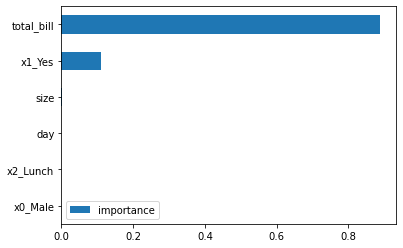

In [108]:
importance_table.sort_values('importance', ascending=True).plot(kind='barh')

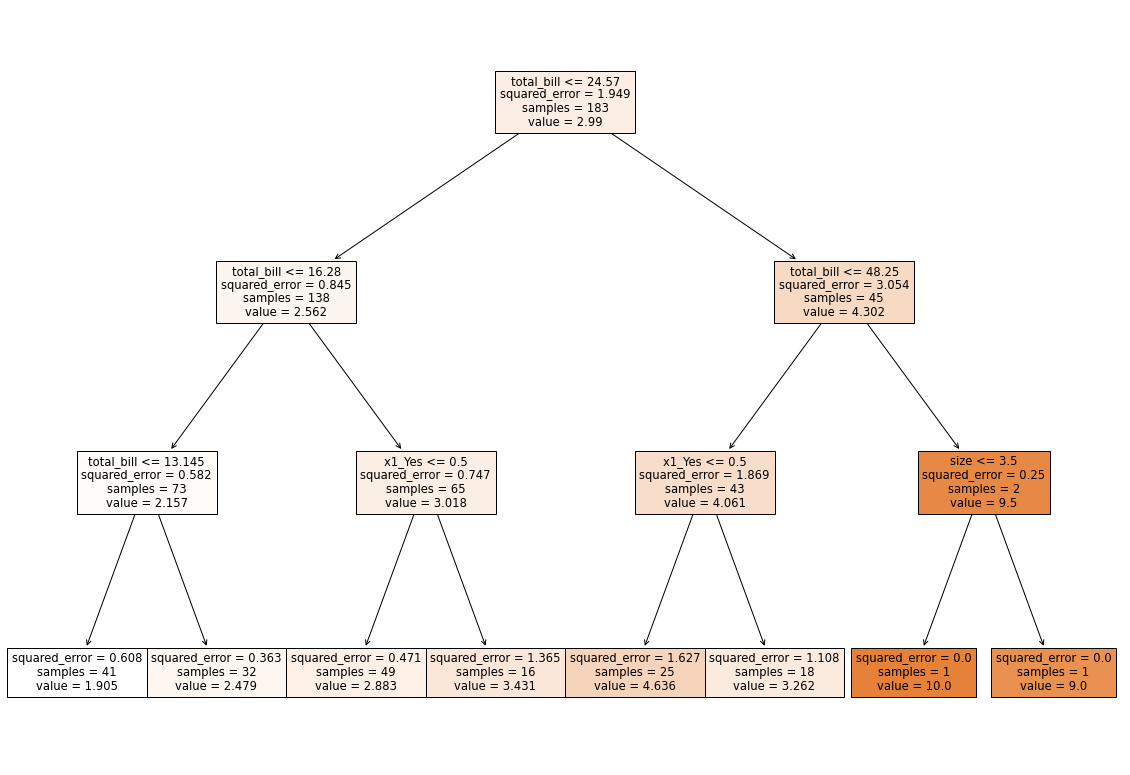

In [109]:
plt.figure(figsize=(20,14))
plot_tree(tree, feature_names=features, filled=True)
plt.show()

In [111]:
pd.Series(y_pred).value_counts()

1.904634    17
2.883061    12
3.431250    10
3.261667     9
2.479375     9
4.636000     3
9.000000     1
dtype: int64